In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('Dry_Bean_Dataset.csv')

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = np.array(df['Class'])

X_train, X_val, y_train, y_val = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, stratify=y_val,test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(8575, 16) (1837, 16) (1838, 16)


### Sprawdzenie czy podział jest spoko 🤓

<Axes: >

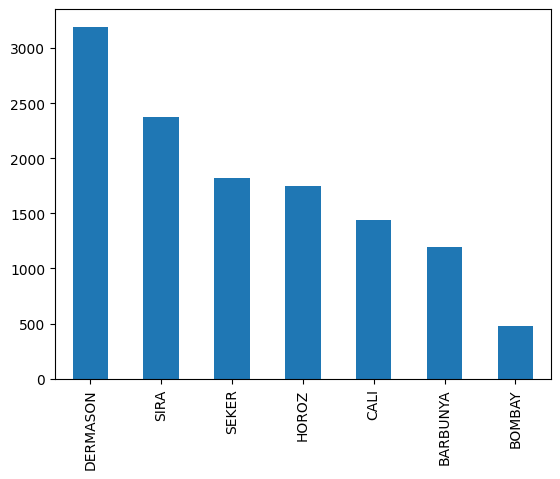

In [27]:
pd.Series(y).value_counts().plot(kind='bar')

<Axes: >

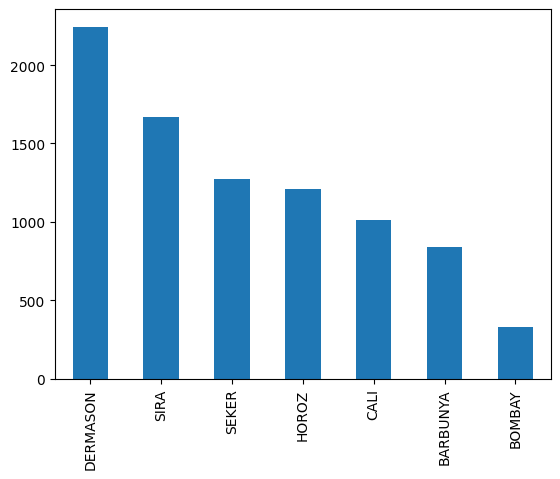

In [28]:
pd.Series(y_train).value_counts().plot(kind='bar')

<Axes: >

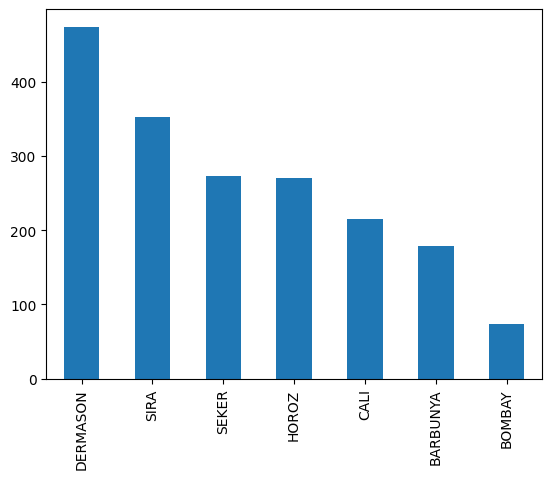

In [29]:
pd.Series(y_val).value_counts().plot(kind='bar')

### Jakieś opisy danych

In [7]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000
mean,53105.229224,855.690255,320.332353,202.291472,1.584051,0.751198,53826.009959,253.152319,0.749597,0.987147,0.873100,0.799681,0.006564,0.001715,0.643300,0.995078
std,29497.722217,215.141676,86.015375,45.147392,0.247213,0.091671,29952.450373,59.412705,0.049153,0.004667,0.059620,0.061733,0.001130,0.000595,0.098963,0.004372
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36400.500000,704.243000,253.377231,175.740707,1.432352,0.715949,36781.500000,215.282502,0.718619,0.985697,0.831659,0.762159,0.005903,0.001152,0.580886,0.993733
50%,44710.500000,795.536500,297.303780,192.481671,1.551479,0.764565,45255.000000,238.594167,0.759891,0.988291,0.883098,0.801150,0.006644,0.001691,0.641841,0.996405
75%,61221.000000,976.546250,376.459017,216.814674,1.708043,0.810697,62156.750000,279.193477,0.786694,0.990014,0.916871,0.834270,0.007274,0.002170,0.696007,0.997900
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999709


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             12250 non-null  int64  
 1   Perimeter        12250 non-null  float64
 2   MajorAxisLength  12250 non-null  float64
 3   MinorAxisLength  12250 non-null  float64
 4   AspectRation     12250 non-null  float64
 5   Eccentricity     12250 non-null  float64
 6   ConvexArea       12250 non-null  int64  
 7   EquivDiameter    12250 non-null  float64
 8   Extent           12250 non-null  float64
 9   Solidity         12250 non-null  float64
 10  roundness        12250 non-null  float64
 11  Compactness      12250 non-null  float64
 12  ShapeFactor1     12250 non-null  float64
 13  ShapeFactor2     12250 non-null  float64
 14  ShapeFactor3     12250 non-null  float64
 15  ShapeFactor4     12250 non-null  float64
 16  Class            12250 non-null  object 
dtypes: float64(1

brak braków danych :)

## Opis danych


- Area - The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - Bean circumference is defined as the length of its border.
- MajorAxisLength - The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - The longest line that can be drawn from the bean while standing perpendicular to the main axis
- AspectRation - Defines the relationship between L and l.
- Eccentricity - Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - The diameter of a circle having the same area as a bean seed area.
- Extent - The ratio of the pixels in the bounding box to the bean area.
- Solidity - Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- roundness - Calculated with the following formula: (4piA)/(P^2)
- Compactness - Measures the roundness of an object: Ed/L

- Class - one of a 7 different bean types

# EDA


## Target variable


<Axes: xlabel='None', ylabel='Class'>

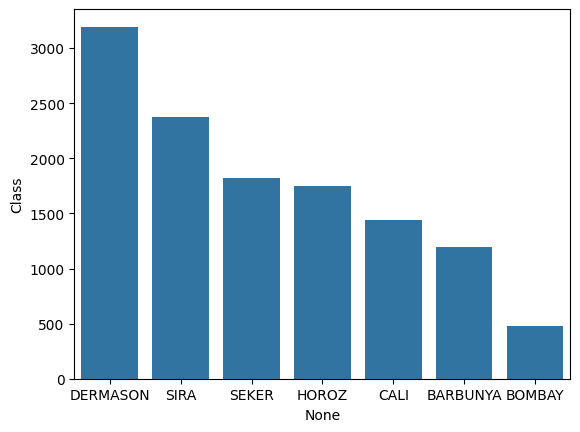

In [9]:
sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts().sort_values(ascending=False))

## Rozkłady danych i wgl

In [10]:
plt.style.use('default')

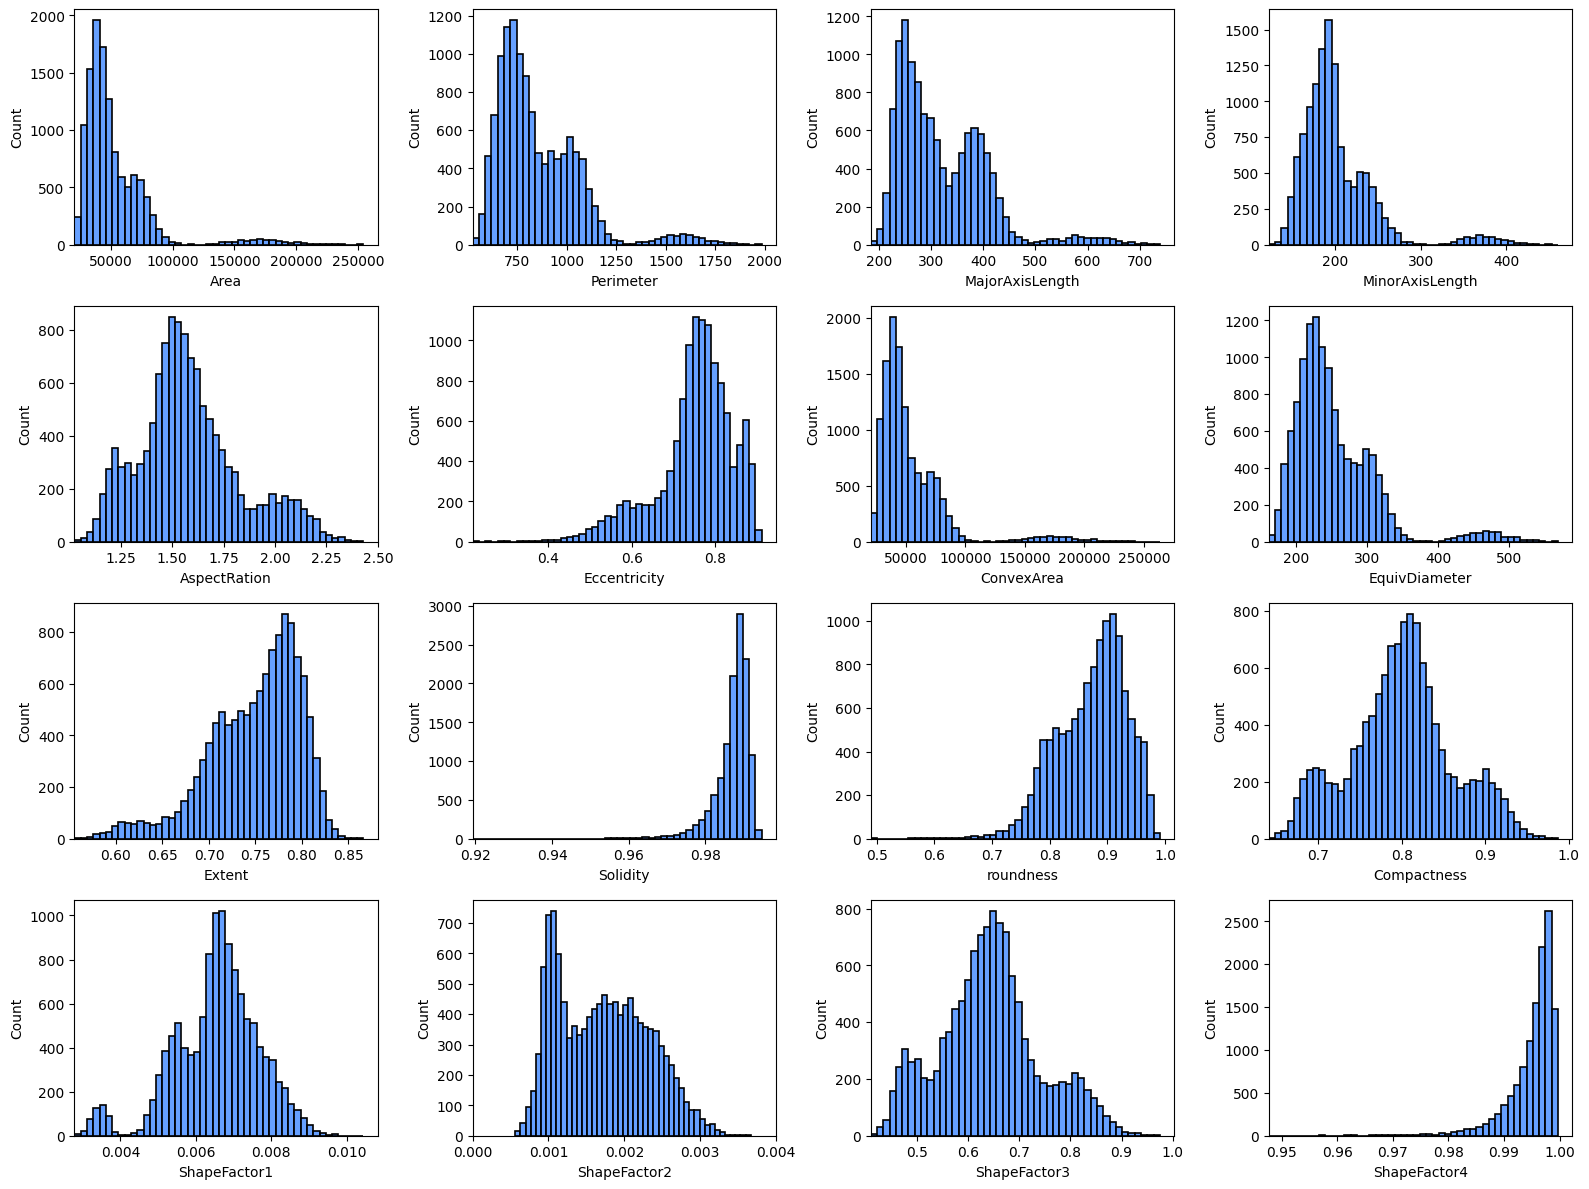

In [12]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.to_list()
fig, axs = plt.subplots(4, 4, figsize=(16, 12))
axs = axs.flatten()
k = np.floor(np.sqrt(df.shape[0])).astype(int)
k2 = np.floor(2*np.cbrt(df.shape[0])).astype(int)
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=axs[i], bins=k2, color='#3381ff', edgecolor='black', linewidth=1.2)
    axs[i].set_xlim(left=min(df[col]))
    if col == 'ShapeFactor2':
        ticks = axs[i].get_xticks()
        axs[i].set_xticks(ticks[::len(ticks)//3]) 

plt.tight_layout()



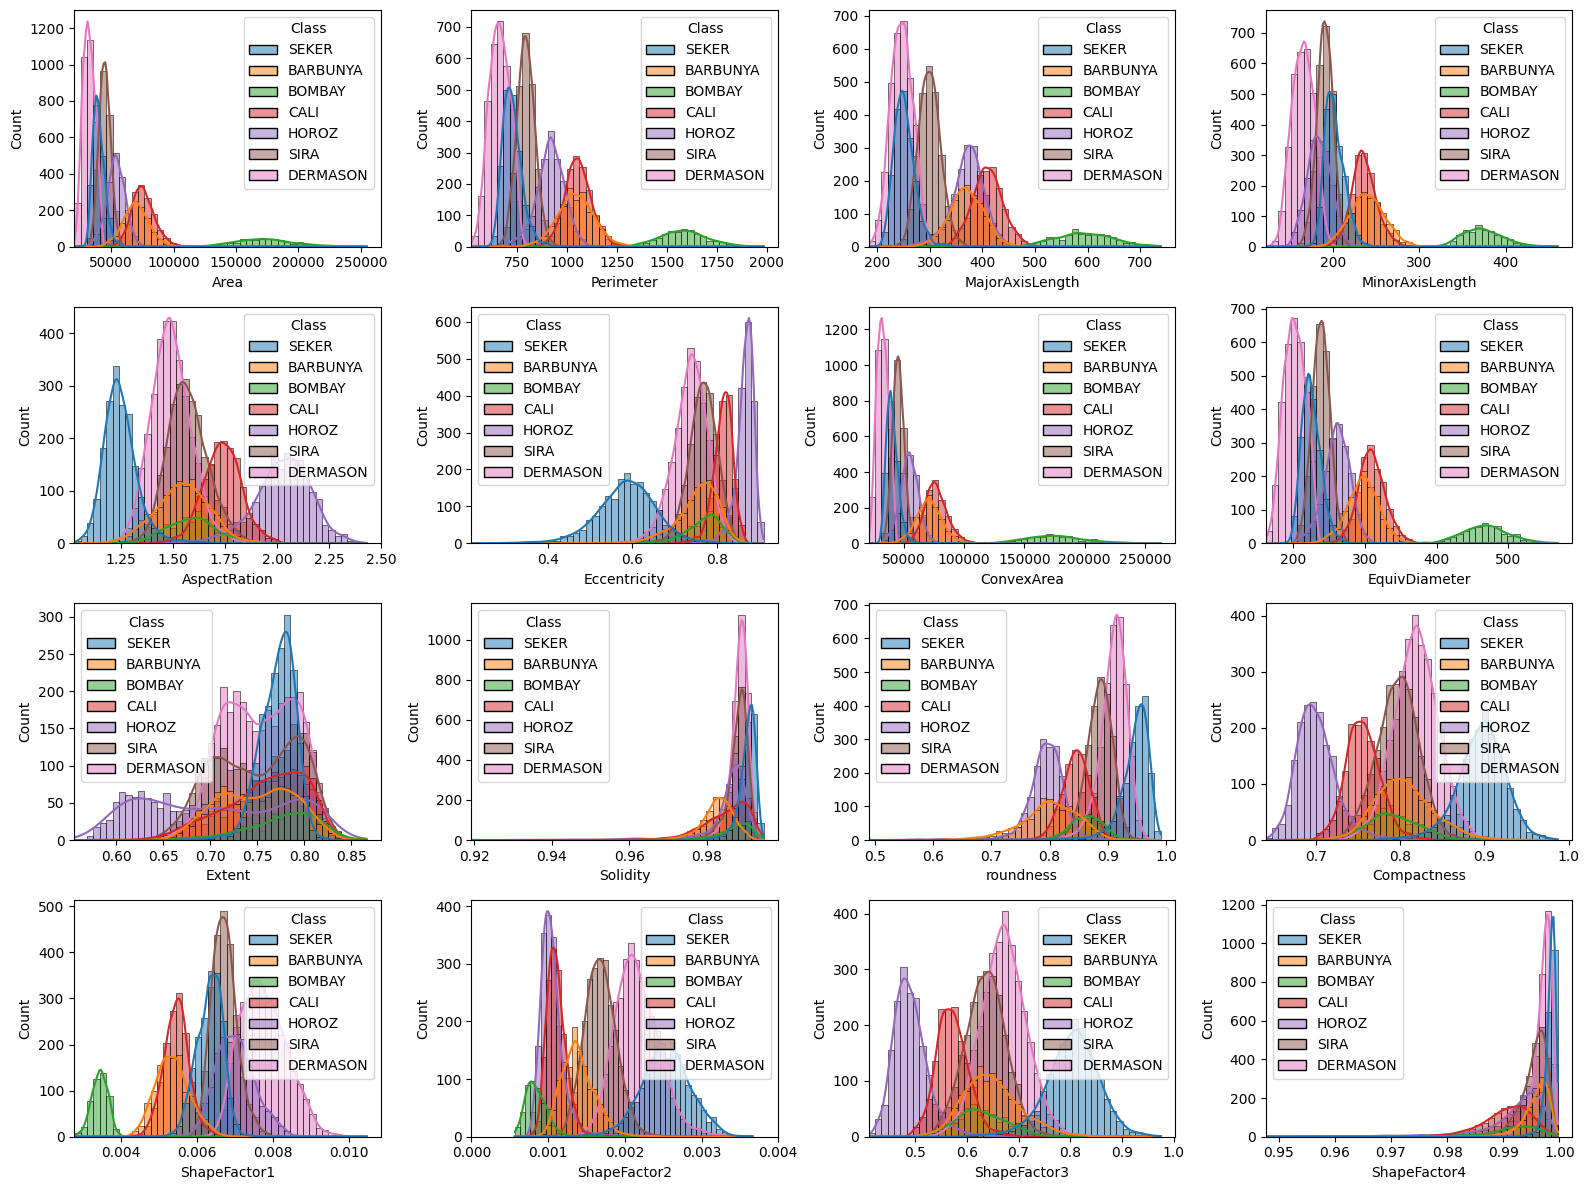

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16, 12))
axs = axs.flatten()
k = np.floor(np.sqrt(df.shape[0])).astype(int)
k2 = np.floor(2*np.cbrt(df.shape[0])).astype(int)
for i, col in enumerate(numeric_cols):
    sns.histplot(df, x=df[col], ax=axs[i], bins=k2, hue='Class', kde=True)
    axs[i].set_xlim(left=min(df[col]))
    if col == 'ShapeFactor2':
        ticks = axs[i].get_xticks()
        axs[i].set_xticks(ticks[::len(ticks)//3]) 

plt.tight_layout()

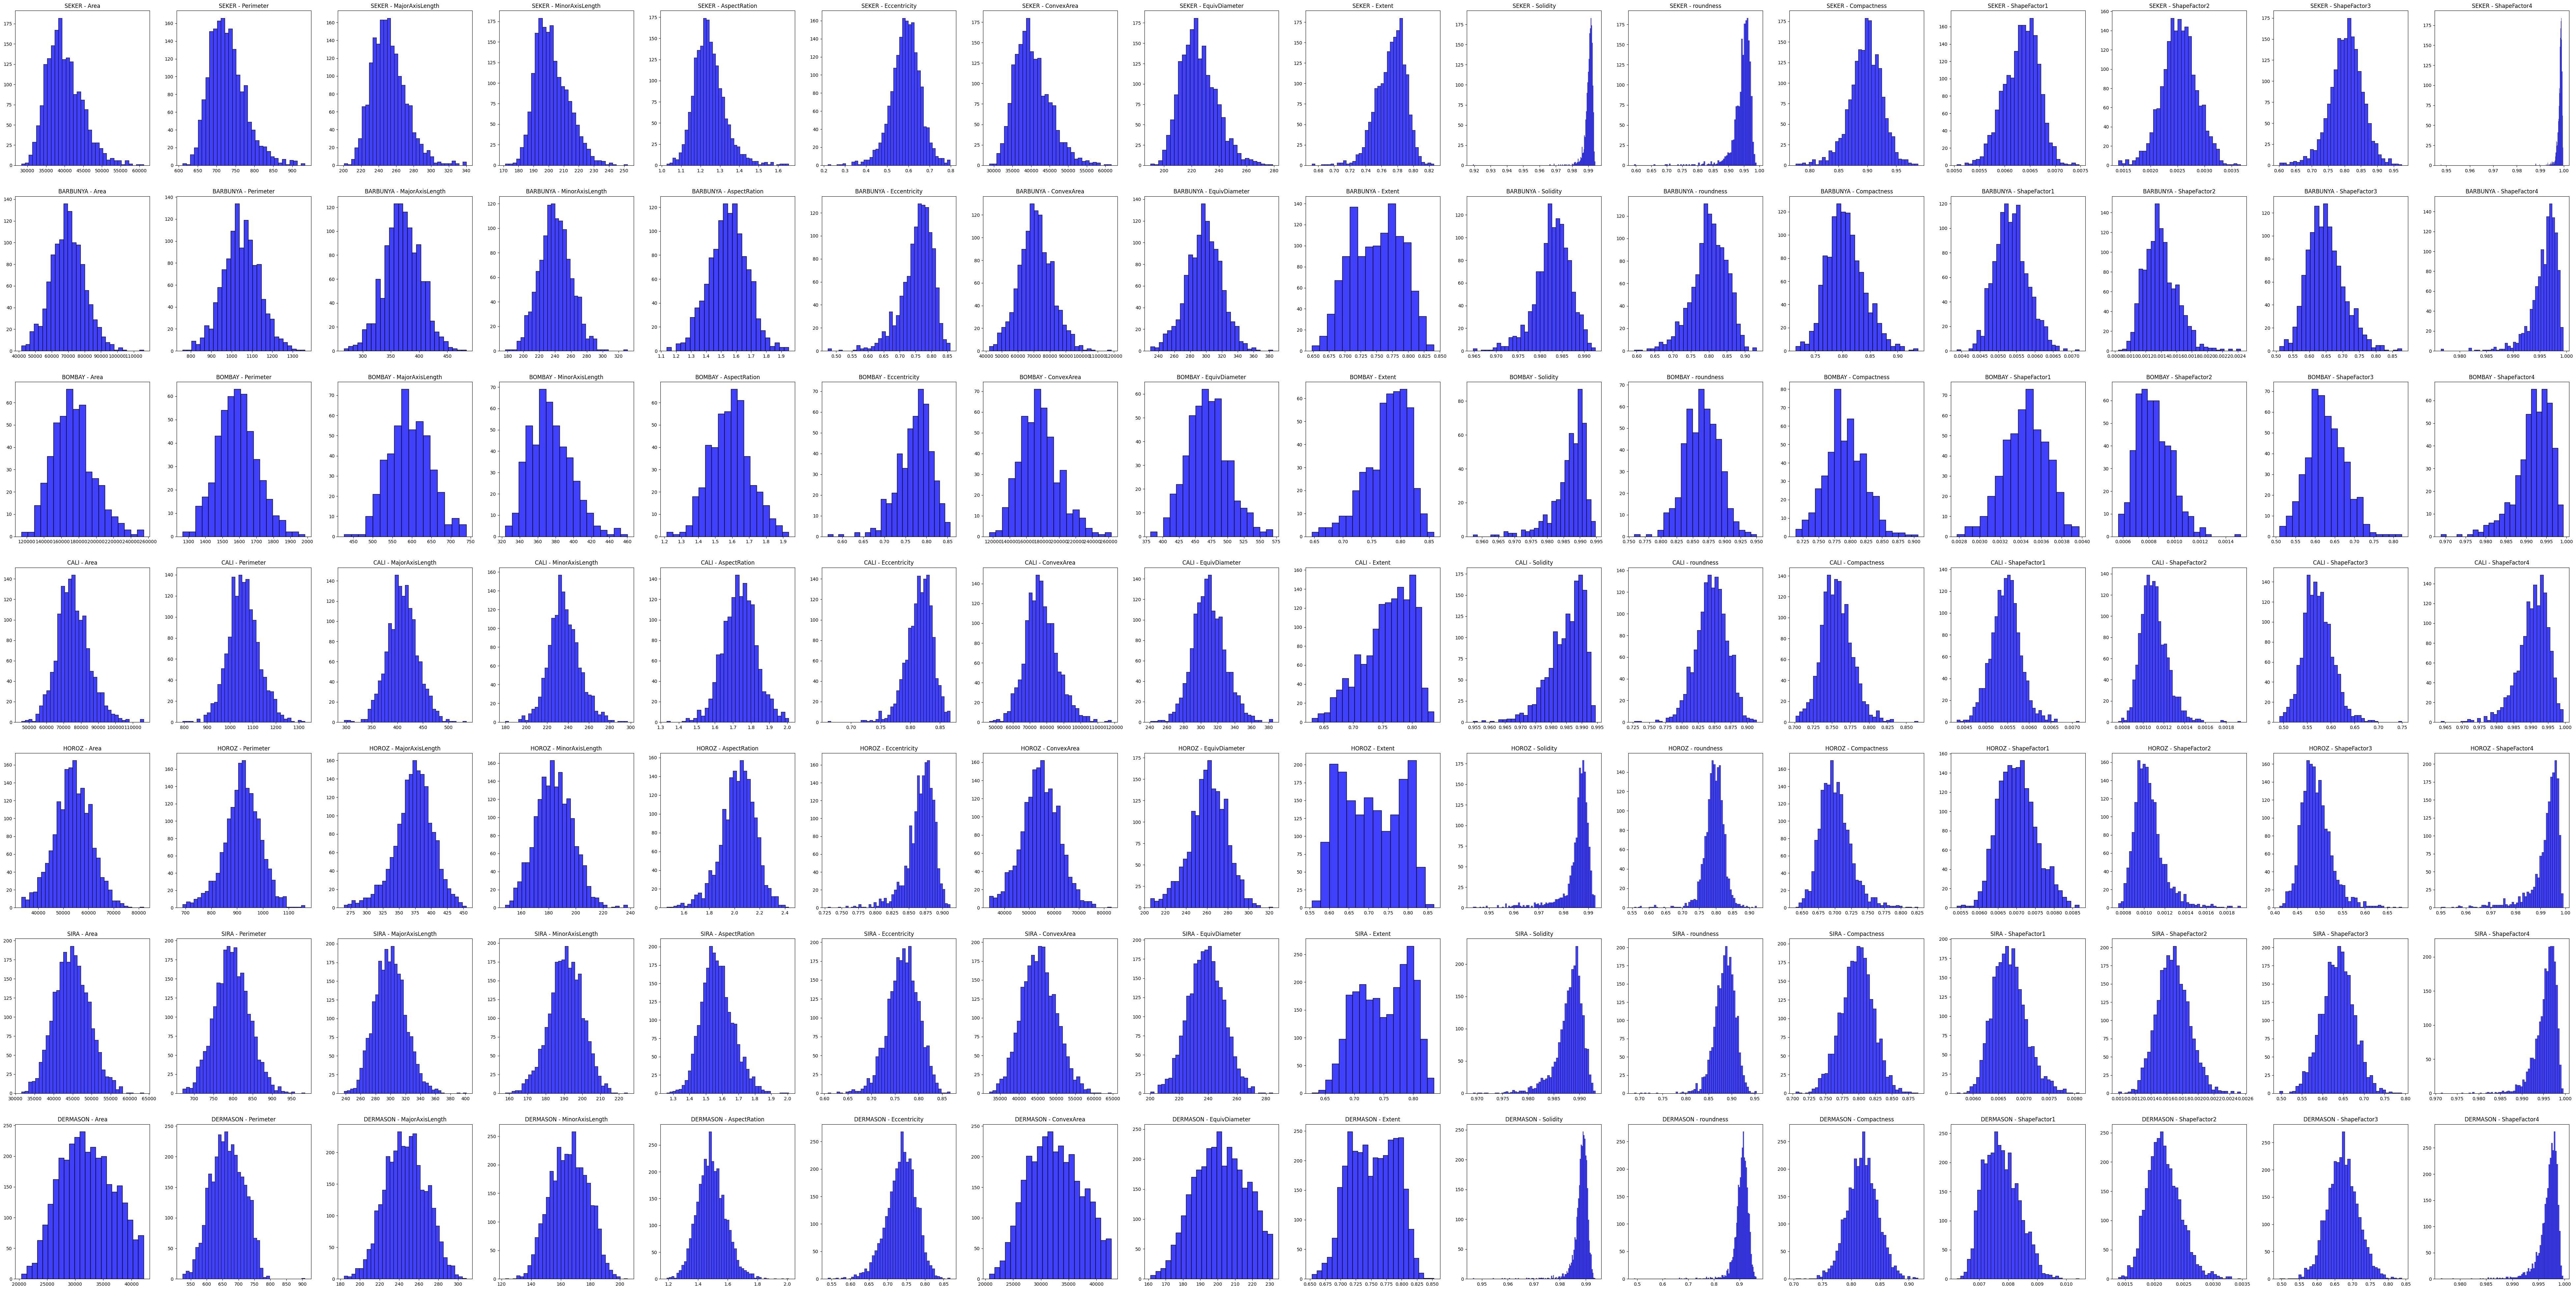

In [13]:
classes = df['Class'].unique()
numeric_cols = df.select_dtypes(include=[np.number]).columns.to_list()
fig, axs = plt.subplots(classes.size, len(numeric_cols), figsize=(100, 50))
for i, class_ in enumerate(classes):
    for j, col in enumerate(numeric_cols):
        sns.histplot(df[df['Class'] == class_][col], ax=axs[i, j], color='blue', label=class_)
        axs[i, j].set_title(f'{class_} - {col}')
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
        axs[i, j].legend().remove()

axs = axs.flatten()

### Boxploty dla wyróżnionych cech

<Axes: xlabel='Class', ylabel='Area'>

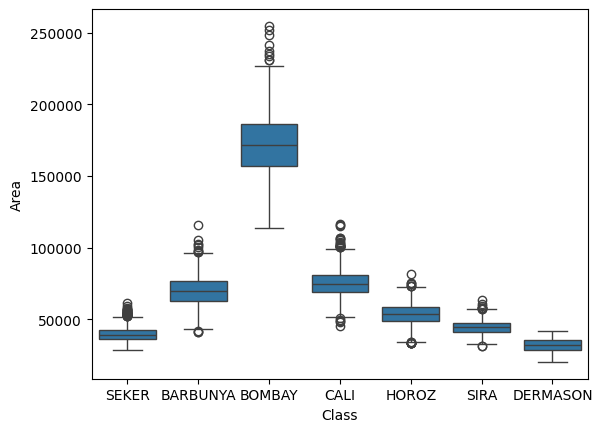

In [14]:
sns.boxplot(data=df, x='Class', y='Area')

<Axes: xlabel='Class', ylabel='Extent'>

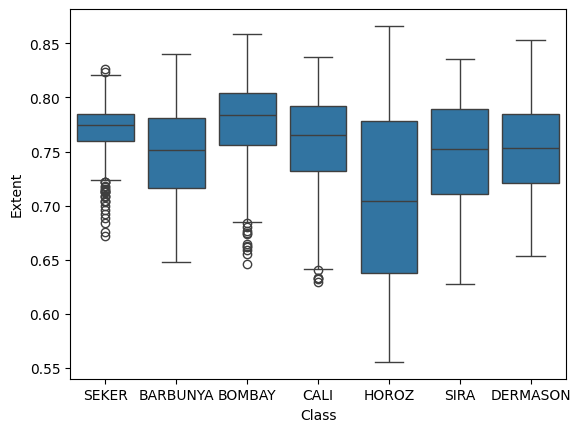

In [15]:
sns.boxplot(data=df, x='Class', y='Extent')

<Axes: xlabel='Class', ylabel='Solidity'>

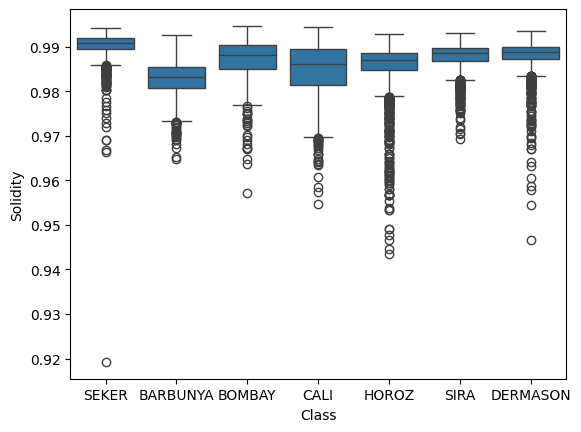

In [16]:
sns.boxplot(data=df, x='Class', y='Solidity')

<Axes: xlabel='Class', ylabel='roundness'>

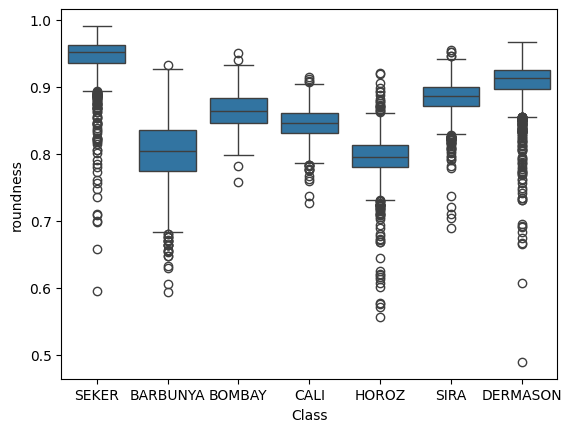

In [18]:
sns.boxplot(data=df, x='Class', y='roundness')

<Axes: xlabel='Class', ylabel='ShapeFactor4'>

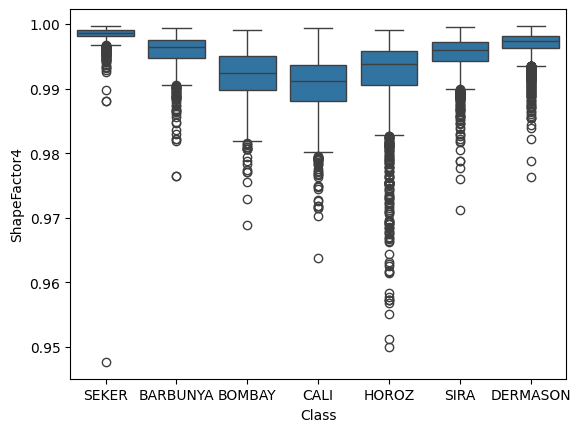

In [19]:
sns.boxplot(data=df, x='Class', y='ShapeFactor4')

 #### Tu taki rozkład każdy z każdym żeby nie trzeba było robić ręcznie miliona wykresów a żeby można było zobaczyć na szybko jakieś ciekawe zależności

In [ ]:
sns.pairplot(df, hue='Class')

#### A tu heatmapa :)

<Axes: >

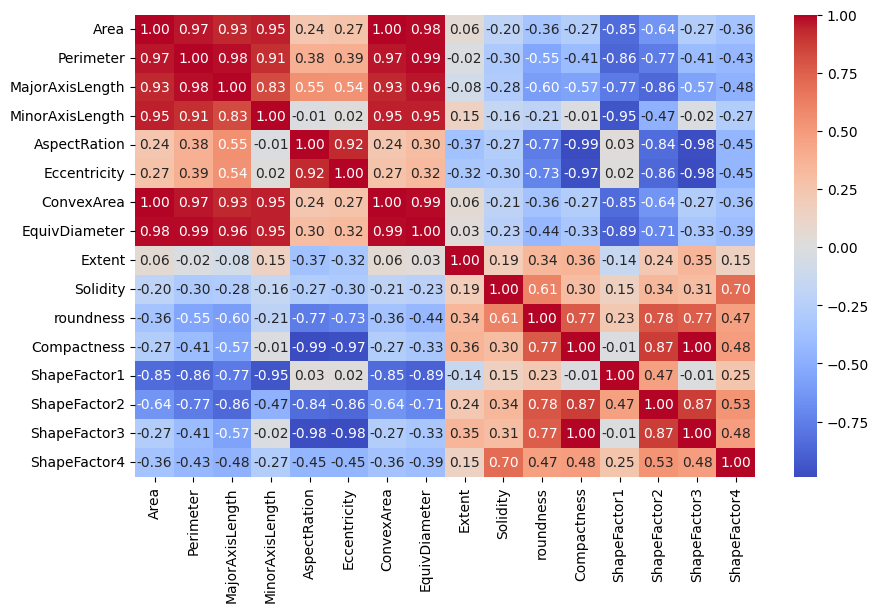

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')